# ML algorithms for FCMs

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns 
from fcmpy.simulator.transfer import Sigmoid, Bivalent, Trivalent, HyperbolicTangent

# ML for optimization of fcm edges 

# 1. Hebbian Learning 

## Task: optimize already existing FCM

#### Step 5: 
When the NHL algorithm has been applied for
over 100 times AND both the termination conditions are  
not met THEN experts are asked to reconstruct the FCM  
model. The new weight matrix Winitial  
new of the reconstructed
FCM is used in Eq. (1) and calculates the Ai again, GO TO
step 3.

#### Step 6: 
IF DOCi does not reach an accepted value THEN
GO TO step 4, determine the parameter Z and implement
the NHL technique again.   
ELSE the process STOPs and
the updated weight matrix is appropriate for the case-study
scenario.
#### NHL flow chart
!['init vals'](figures/nhl_flow.png)
#### AHL flow chart
!['init vals'](figures/ahl_flow.png)

!['init vals'](figures/init.png)

For more information about the algorithms, please check out 
**Unsupervised learning techniques for fine-tuning fuzzy cognitive
map causal links** by
Elpiniki I. Papageorgioua, Chrysostomos Styliosb, Peter P. Groumposa

In [2]:
W_final_nhl =np.asarray([
[0,-0.1736,-0.0265,0,0.479],
[0.5103, 0, 0, 0, 0],
[0.5753, 0, 0, 0, 0],
[-0.90, 0, 0, 0, 0],
[0, 0.707, 0, 0.493, 0]])

W_final_ahl =np.asarray([
[0,-0.1822,-0.0855,0.1055,0.316],
[0.3528, 0, 0.101, 0.115, 0.11],
[0.4134, 0.102, 0, 0.105, 0.1],
[-0.5038, 0.114, 0.102, 0, 0.111],
[0.1052, 0.532, 0.098, 0.322, 0]])

In [3]:
# 1. Define initial FCM
# values from the articles, initial and final values 
W_final = np.asarray([
[0,-0.1736,-0.0265,0,0.479],
[0.5103, 0, 0, 0, 0],
[0.5753, 0, 0, 0, 0],
[-0.90, 0, 0, 0, 0],
[0, 0.707, 0, 0.493, 0]])

W_init = np.asarray([[0,-0.4,-0.25,0,0.3],[0.36,0,0,0,0],[0.45,0,0,0,0],[-0.9,0,0,0,0],[0,0.6,0,0.3,0]])
A0 = np.asarray([0.4,0.707,0.607,0.72,0.3])

# DOCs 
doc = {0:[0.68,0.74],4:[0.74,0.8]}

# 1. NHL

In [4]:
from fcmpy.ml.hebbian.runner import simulator

In [5]:
records = []
# for lbd in np.arange(0.9,1.01,0.01):
for lbd in np.arange(0.9,1.01,0.01): #(0.9,1.01,0.01)
    for decay in np.arange(0.95,1.0,0.01):
        for learning_rate in np.arange(0.001,0.1,0.001): 
            run = simulator('nhl', learning_rate=learning_rate,decay=decay, A0=A0, W_init= W_init, doc=doc,lbd = lbd)
            # we do this loop for a particular initiated learning rate
            if run is not None:
                records.append(run)

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


### Results NHL 
Difference between weight matrix reported in the article by Elpiniki et al. vs. obtained ones. Differences occures due to different hyper parameters values used in the learning process. 


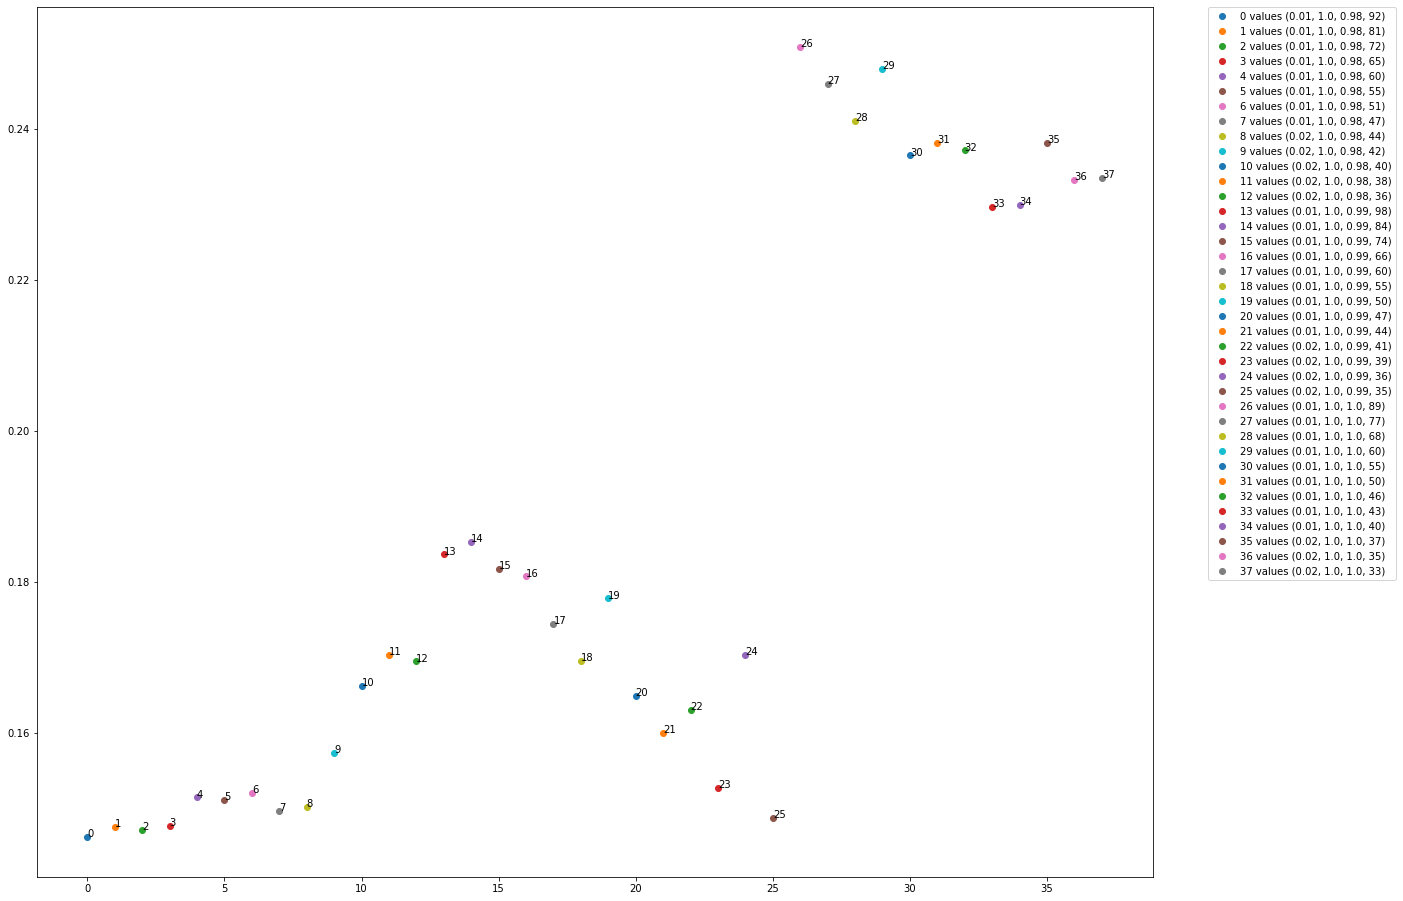

In [6]:
# difference between last W real values and nodes 
A = [np.sum(abs(records[i]['W'][-1] - W_final_nhl)) for i in range(len(records))]

B = [(round(records[i]['learning_rate'],2),round(records[i]['decay coef'],2),round(records[i]['lbd'],2),records[i]['steps']) for i in range(len(records))]
plt.figure(figsize=(20,16))
for i in range(len(A)):
    
    plt.scatter(i, A[i], label = str(i) + ' values ' + str(B[i]))
    plt.annotate(i,(i,A[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


    

Text(0.5, 1.0, 'mnimum')

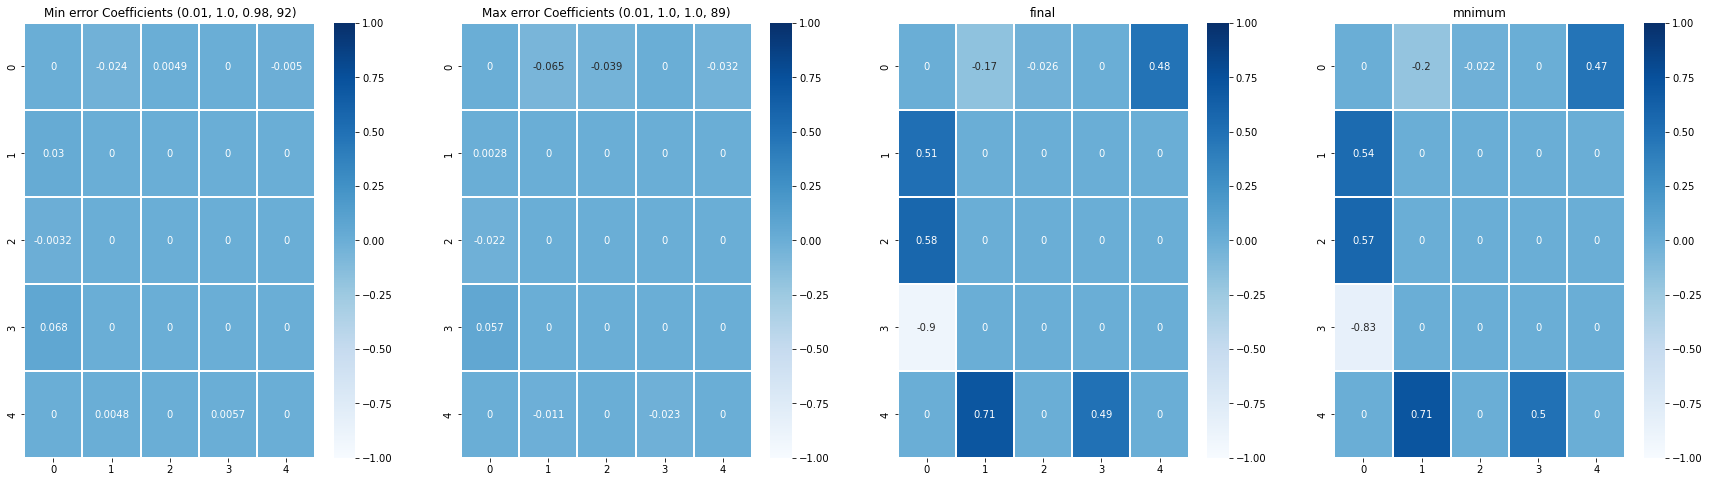

In [7]:
mini = A.index(min(A))
maxi = A.index(max(A))

plt.figure(figsize=(30,8))
plt.subplot(1,4,1)
sns.heatmap(records[mini]['W'][-1] - W_final_nhl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('Min error Coefficients ' + str(B[mini]))
plt.subplot(1,4,2)
sns.heatmap(records[maxi]['W'][-1] - W_final_nhl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('Max error Coefficients ' + str(B[maxi]))
plt.subplot(1,4,3)
sns.heatmap(W_final_nhl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('final')
plt.subplot(1,4,4)
sns.heatmap(records[mini]['W'][-1], annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('mnimum')

# print(records[-1]['W'][-1] == record[-1]['W'][-2]) 



### 1.1 Testing 
Testing if the simulated FCM 'keeps' the DOCs' values in the desired range


In [8]:
def simulateFCM(concepts, weights, nsteps,lamb = 1):
    '''
    simulates fcm in ordert to create historical data
    :param concepts: initial values of concetps (can be multiple initial vectors)
    :param weights: weight matrix
    :param nsteps: n of timesteps
    :return: historical data which has to be fed to the algorithm
    '''
    # concepts should be given as a np.array((1,nConcepts))
    # weights as np.array((nConcepts,nConcepts-1)) !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    out = np.zeros((nsteps,concepts.shape[0]))       
    out[0] = concepts
    for j in range(1, nsteps):
        newvalues = np.zeros((concepts.shape[0]))       
        newvalues = 1 / (1 + np.exp(-lamb*(concepts + concepts@weights))) #np.sum((weights.T*concepts).T,axis=1)
        # unfortunately using this way we will change the values of the concepts in the same time step, that is why we need to operate on more variables
        # BROOOOOO
        out[j] = newvalues
        concepts = newvalues
    return out

In [9]:
doc = {0:[0.68,0.74],4:[0.74,0.8]}
score = 0
for i in range(len(records)):
    out = simulateFCM(np.random.random(size=(5,)),records[i]['W'][-1],100,records[i]['lbd'])[-1] # records[2]['W'][-1]
    if out[0]< doc[0][0] or out[0] > doc[0][1] or out[4]< doc[4][0] or out[4]> doc[4][1]:
        print("error")
    else: 
        score +=1
print(score == len(records))

True


# 2. AHL

In [10]:
from fcmpy.ml.hebbian.runner import simulator
recordsahl = []
# for lbd in np.arange(0.9,1.01,0.01):
lbd = 1
for decay in np.arange(0.01,0.1,0.01): 
    for learning_rate in np.arange(0.001,0.1,0.001):
        run = simulator('ahl', learning_rate=learning_rate,decay=decay, A0=A0, W_init= W_init, doc=doc, lbd = lbd)
        # we do this loop for a particular initiated learning rate
        if run is not None:
            recordsahl.append(run)

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


In [11]:
run = simulator('ahl', learning_rate=0.05,decay=0.04, A0=A0, W_init= W_init, doc=doc, lbd = lbd)
print(run['W'][-1])

success
[[ 0.         -0.19263116 -0.09329811  0.10261983  0.30960542]
 [ 0.34888529  0.          0.09887336  0.11315432  0.09898773]
 [ 0.41319901  0.09864935  0.          0.10320872  0.08987416]
 [-0.54609355  0.11165973  0.09991694  0.          0.10088377]
 [ 0.08410786  0.53700718  0.08717811  0.31944458  0.        ]]


### Results AHL 
Difference between weight matrix reported in the article by Elpiniki et al. vs. obtained ones. Differences occures due to different hyper parameters values used in the learning process. 


### due to large number of results, we just showed the closest to the ones presented in the article

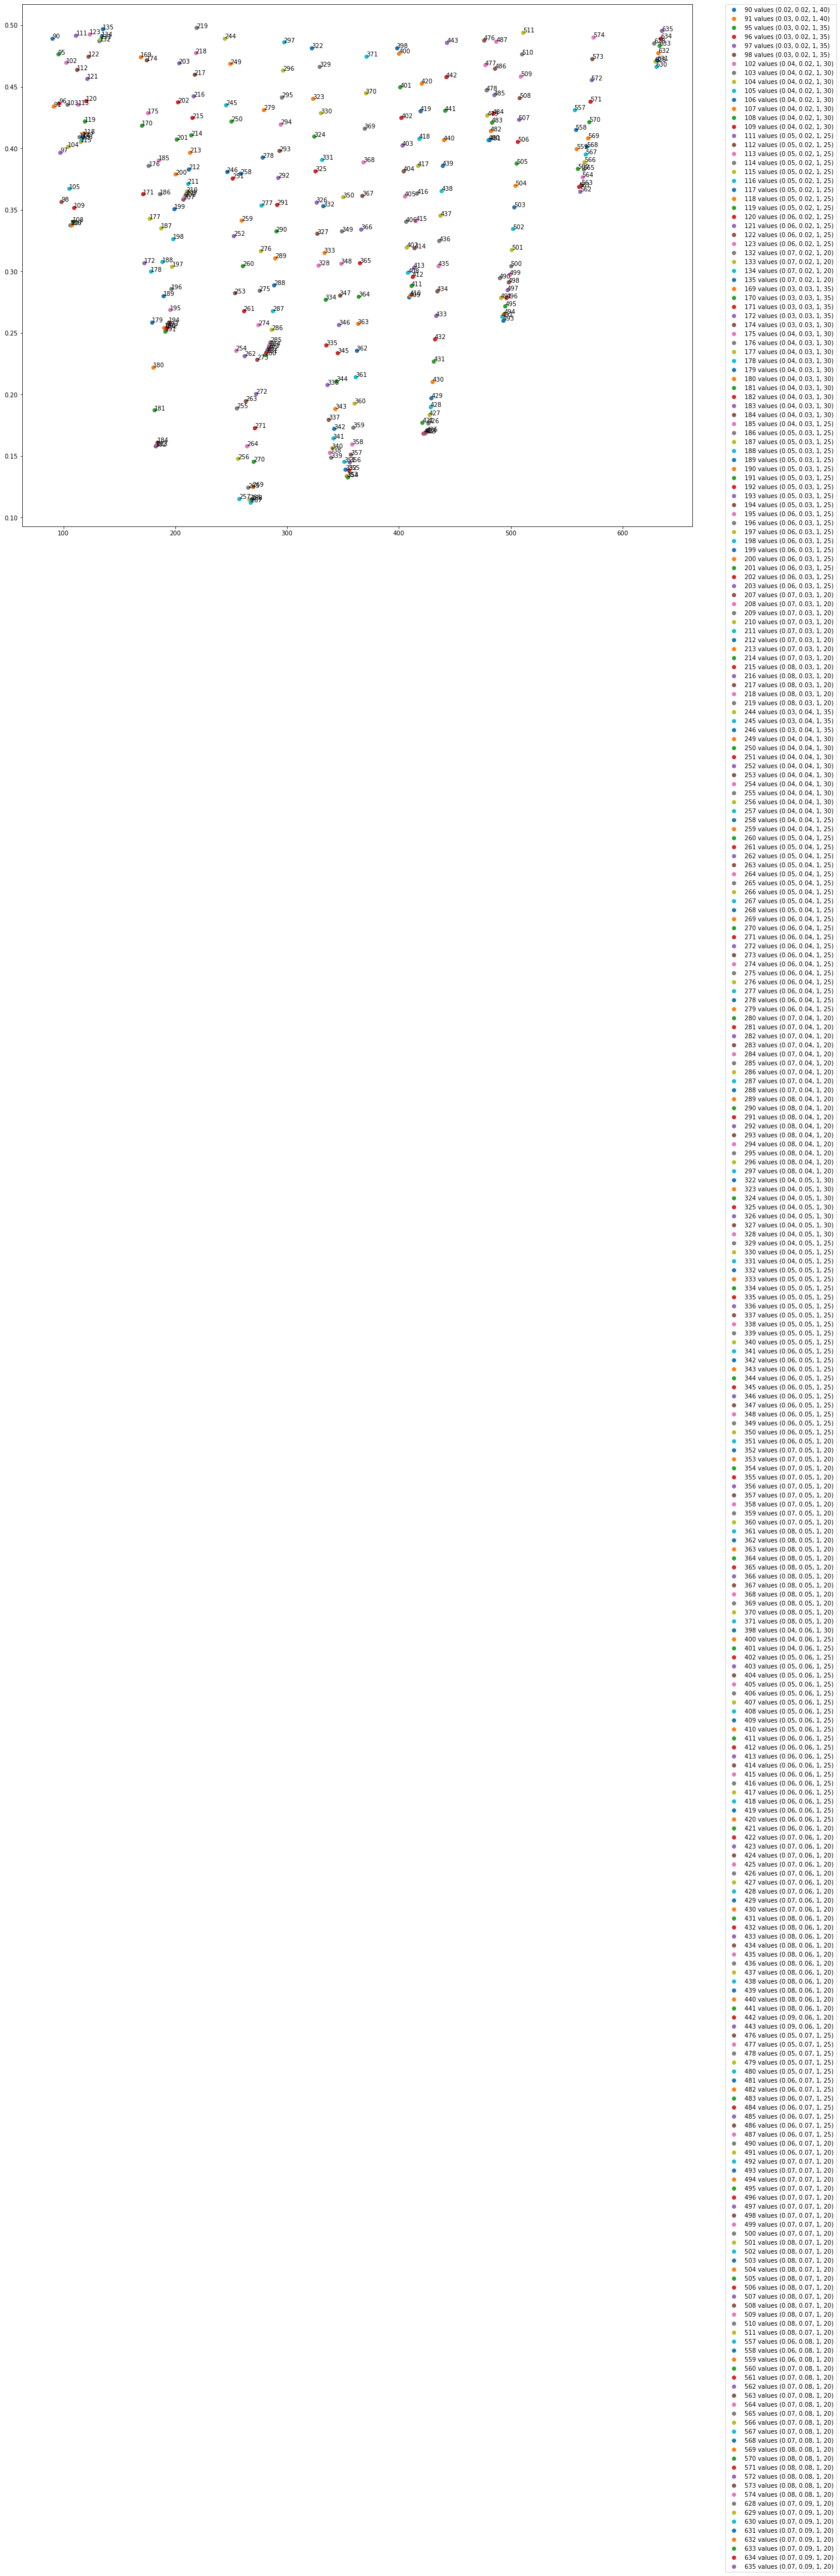

In [12]:
# difference between last W real values and nodes 
A = [np.sum(abs(recordsahl[i]['W'][-1] - W_final_ahl)) for i in range(len(recordsahl))]

B = [(round(recordsahl[i]['learning_rate'],2),round(recordsahl[i]['decay coef'],2),round(recordsahl[i]['lbd'],2),recordsahl[i]['steps']) for i in range(len(recordsahl))]
plt.figure(figsize=(20,16))
for i in range(len(A)):
    if A[i]>0.5:
        continue
    plt.scatter(i, A[i], label = str(i) + ' values ' + str(B[i]))
    plt.annotate(i,(i,A[i]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


    

Text(0.5, 1.0, 'mnimum')

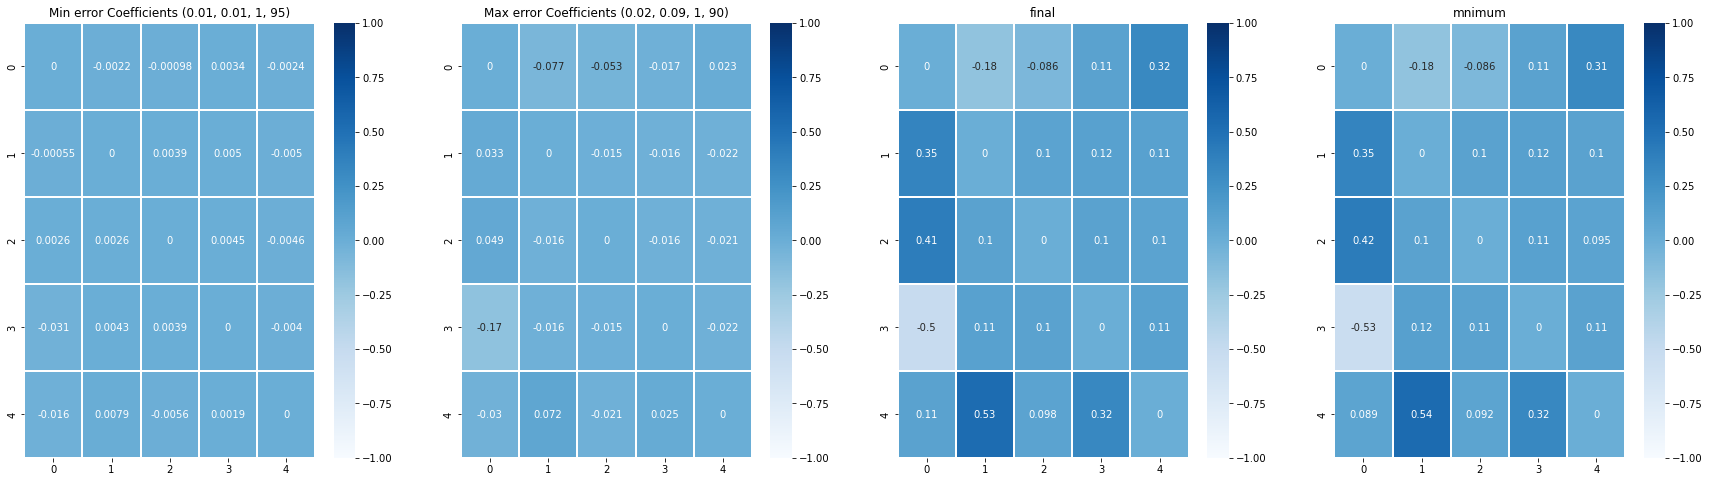

In [13]:
miniahl = A.index(min(A))
maxiahl = A.index(max(A))

plt.figure(figsize=(30,8))
plt.subplot(1,4,1)
sns.heatmap(recordsahl[miniahl]['W'][-1] - W_final_ahl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('Min error Coefficients ' + str(B[mini]))
plt.subplot(1,4,2)
sns.heatmap(recordsahl[maxi]['W'][-1] - W_final_ahl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('Max error Coefficients ' + str(B[maxiahl]))
plt.subplot(1,4,3)
sns.heatmap(W_final_ahl, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('final')
plt.subplot(1,4,4)
sns.heatmap(recordsahl[miniahl]['W'][-1], annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1)
plt.title('mnimum')

# print(records[-1]['W'][-1] == record[-1]['W'][-2]) 



### 2.1 Testing 
Testing if the simulated FCM 'keeps' the DOCs' values in the desired range


In [14]:
doc = {0:[0.68,0.74],4:[0.74,0.8]}
score = 0
for i in range(len(records)):
    out = simulateFCM(np.random.random(size=(5,)),records[i]['W'][-1],100,records[i]['lbd'])[-1] # records[2]['W'][-1]
    if out[0]< doc[0][0] or out[0] > doc[0][1] or out[4]< doc[4][0] or out[4]> doc[4][1]:
        print("error")
    else: 
        score +=1
print(score == len(records))
score

True


38

In [15]:
recordsahl[mini]['W'][-1]

array([[ 0.        , -0.24655007, -0.13753182,  0.06417293,  0.29413976],
       [ 0.33624856,  0.        ,  0.06161403,  0.07058345,  0.06798876],
       [ 0.40429219,  0.06192764,  0.        ,  0.06323993,  0.06082575],
       [-0.62260618,  0.07035321,  0.06241155,  0.        ,  0.06895874],
       [ 0.06066065,  0.52693414,  0.06008819,  0.29840626,  0.        ]])

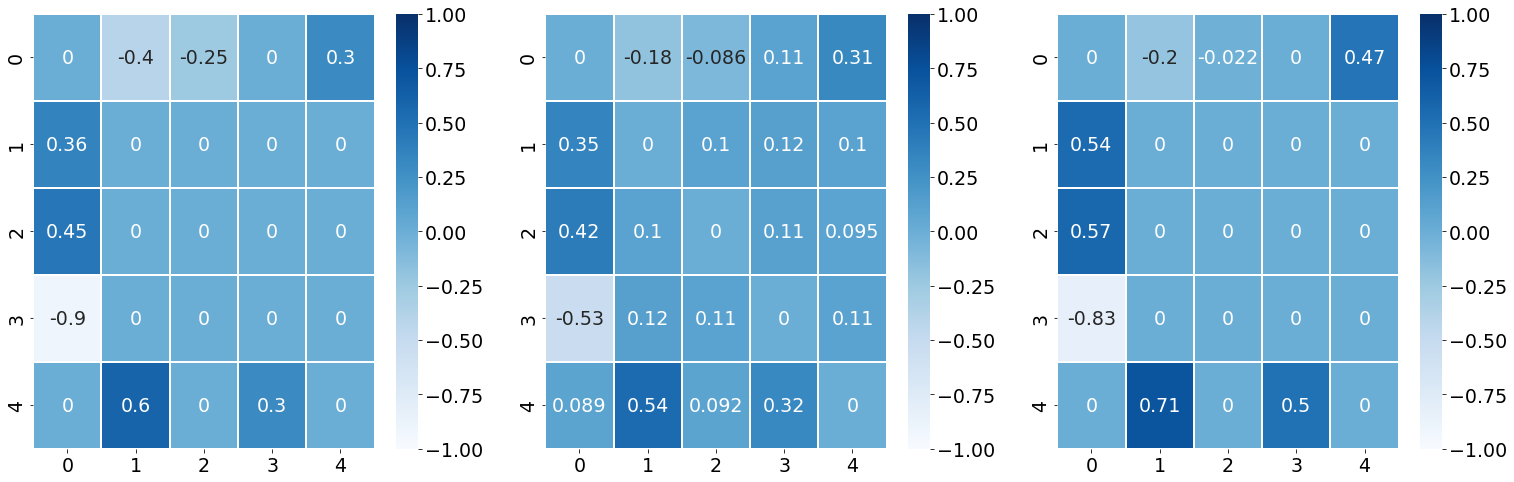

In [16]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 19,'font.weight':'normal'})

fig,ax = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(26,8)

# ax[0].set_title('Initial weight matrix')
# ax[1].set_title('Weight matrix optimized by AHL')
# ax[2].set_title('Weight matrix optimized by NHL')

sns.heatmap(W_init, annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1,ax=ax[0])
sns.heatmap(recordsahl[miniahl]['W'][-1], annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1,ax=ax[1])
sns.heatmap(records[mini]['W'][-1], annot=True,linecolor='w',linewidths='1',cmap='Blues',vmin=-1, vmax=1,ax=ax[2])

### Summary 
Hebbian learning algorithms successfuly optimized the initial FCM. They proven to converge for multiple combinations of hyperparameters and input values. The differneces between our results and the resutls presented by the Elpiniki et al. comes from the fact that different hyperparameters were used. Nevertheless, it is important to notice that: (i) the differences are not significantly high, (ii) water tank example is a ''famous'' case study for FCM research and divergent results were reported by various authors.

# ML for bulding fcm (casual fcm, not for classification) 

# 3. RCGA
## Task: create FCM based on one input

!['rcga'](figures/gen_alg.png)


## 1. Crossover 
- Given two chromosomes and their weights matrixes, we randomly switch n weights between these matrixes 
- Many crossover methods are available
- used with probability of 90%

!['crossover'](figures/crossover.png)

## 2. Mutations
Value of randomly chosen weight in the chromosome is being change into new value with the same sign

## 3. Selection
Selection is the stage of a genetic algorithm in which individual genomes are chosen from a population for later breeding (using the crossover operator).


**Roulette wheel selection**


Selecting with weight probability, depending on the fitness of the individual gene 
Fitness values [1, 2, 3, 4], then the sum is (1 + 2 + 3 + 4 = 10). Therefore, you would want the probabilities or chances to be [1/10, 2/10, 3/10, 4/10] or [0.1, 0.2, 0.3, 0.4]
The chosen one is taken for the crossover 


**Tournament selection**


Winner of the tournament is being selected for the crossover 
two variants of the selection: with and without replacement

## 4. Fitness function 
Fitness is calculated as difference between concept values on each step of the simulation

!['crossover'](figures/fitness.png)

For more information about the algorithms, please check out **LEARNING AND AGGREGATION OF FUZZY COGNITIVE MAPS – AN
EVOLUTIONARY APPROACH**
by
Wojciech Stach





In [17]:
from fcmpy.ml.genetic.rcga import rcga,reshapeW,simulateFCM

### Test 1 
Randomly generated weight matrices and concepts.  

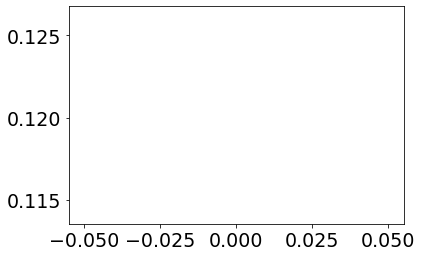

We are at 100/100000
max fitness function so far is 0.34021263119343276
We are at 200/100000
max fitness function so far is 0.3785300983570715
We are at 300/100000
max fitness function so far is 0.4765839416232332
We are at 400/100000
max fitness function so far is 0.5148204450437415
We are at 500/100000
max fitness function so far is 0.5427217392104279
We are at 600/100000
max fitness function so far is 0.6115660908007468
We are at 700/100000
max fitness function so far is 0.6665366031575043
We are at 800/100000
max fitness function so far is 0.7697860218097318
We are at 900/100000
max fitness function so far is 0.782014205053431
We are at 1000/100000
max fitness function so far is 0.79221025989131
We are at 1100/100000
max fitness function so far is 0.7948851367130901
We are at 1200/100000
max fitness function so far is 0.810790749218084
We are at 1300/100000
max fitness function so far is 0.8123346188257905
We are at 1400/100000
max fitness function so far is 0.8172977472086631
We a

KeyboardInterrupt: 

In [18]:
for i in range(5):    
    # random test cases 
    A0 = np.random.random(size=(4,5))
    m = np.ones((5,5))
    np.fill_diagonal(m,0)
    W_init = np.random.uniform(low=-1, high=1, size=(5,5))*m
    testc = 5
    #

    # test 2
    nofsteps = 2
    
   

    W_init = reshapeW(W_init,'in')
    historicaldata = np.zeros((A0.shape[0],A0.shape[1]))
    for concepts,i in zip(A0,range(A0.shape[0])):
        historicaldata[i] = simulateFCM(concepts, W_init, nofsteps)
    GA = rcga(A0,historicaldata=historicaldata,numberofsteps=nofsteps,max_generations=50000) 
    W_final = GA.run()


In [ ]:
a = np.random.uniform(low=-1,high=1,size=(5,5))
np.fill_diagonal(a,0)
a

### Test 2 Water tank 

In [ ]:
testc = 5
#

# test 2
nofsteps = 2
A0 = np.asarray([[0.4, 0.707, 0.607, 0.72, 0.3],[0.5, 0.66, 0.56, 0.78, 0.27],[0.6, 0.8, 0.5, 0.77, 0.34],[0.45,0.73,0.65,0.74,0.31]])
W_init = np.asarray([[0,-0.4,-0.25,0,0.3],[0.36,0,0,0,0],[0.45,0,0,0,0],[-0.9,0,0,0,0],[0,0.6,0,0.3,0]])


W_init = reshapeW(W_init,'in')
historicaldata = np.zeros((A0.shape[0],A0.shape[1]))
for concepts,i in zip(A0,range(A0.shape[0])):
    historicaldata[i] = simulateFCM(concepts, W_init, nofsteps)
GA = rcga(A0,historicaldata=historicaldata,numberofsteps=nofsteps)
W_final = GA.run()

### Test 3 Heart attack risk

In [ ]:
testc = 7
#

# test 2
nofsteps = 2
A0 = np.asarray([[0.47, 0.51, 0.13, 0, 1, 0.37, 0.1]])
W_init = np.asarray([[0,0,0.20,0.3,0,0,0.45],
    [0,0,0,0.40,0,0,0.35],
    [0,0,0,0.30,0,0,0.30],
    [0,0,0,0,0,0,0.40],
    [0.30,0,0.15,0.35,0,0,0.25],
    [0.20,0,0.25,0.30,0,0,0.20],
    [0,0,0,0,0,0,0]])


W_init = reshapeW(W_init,'in')
historicaldata = np.zeros((A0.shape[0],A0.shape[1]))
for concepts,i in zip(A0,range(A0.shape[0])):
    historicaldata[i] = simulateFCM(concepts, W_init, nofsteps)
GA = rcga(A0,historicaldata=historicaldata,numberofsteps=nofsteps)
W_final = GA.run()



### Summary 
very high fitness function can be observered in 3 test cases. It is easier to creates the FCM using RCGA algorithm just for one input vector what is showed in the example 3, where the algorithm converged relatively fast, achieving over 0.999 fitness values. Algorithm is also effective for higher number of input vectors, and even for randomly genereted values it achieved over 0.9 fitness after 100k generations. 

# ML for classification task using FCMs

# 4. MP Algorithm (gonzalo)
## Task: create FCM based on a bunch of data (for classification purposes)

For more information about the algorithm, please check out 

**Deterministic learning of hybrid Fuzzy Cognitive Maps and network
reduction approaches**
Gonzalo Nápoles, Agnieszka Jastrzębska Carlos Mosquera Koen Vanhoof
Władysław Homenda

In [ ]:
import os
sources = []
for filename in os.listdir(path='fcmpy/ml/data'):
    if filename[-4:] == 'arff':
        sources.append('fcmpy/ml/data/'+filename)
        
print(sources)

In [ ]:
import fcmpy.ml.classification.FCM_MP as mp

In [ ]:
params = {'L':0, 'M':1,
          'T':None, 'b1':1.0, 'folds':10,
          'output':'./output.csv', 'p':[1.0, 1.0, 1.0, 1.0],
          'rule':0, 'sources':sources, 'verbose':False}
out = mp.run(**params)


# Resutls 
Results show the importance of the feautres for the classification task. They can be compare to the ones obtained by the Napoles et. al. Mutliple datasets described in the article, were used to test the functionality of the algorithm.

In [ ]:
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams.update({'font.size': 19,'font.weight':'normal'})
fig, ax = plt.subplots(3,6, sharex=False, sharey=True,figsize= (50,20))
fig.get_default_bbox_extra_artists
k = 0
for i in range(3):
    for j in range(6):
#         ax.
        ax[i,j].set_title(out[k]['filename'])
    #     ax.yticks(np.round(np.arange(-1,1.2,0.2).astype(float),2).tolist())
        ax[i,j].bar(range(len(out[k]['weights'][1].flatten())),height=out[k]['weights'][1].flatten())
        ax[i,j].set_xlabel('Feature')
        ax[i,j].set_ylabel('Importance')
        k+=1

# fig, ax = plt.subplots(figsize=(10,8))
# ax.bar(range(len(out[3]['importance'].flatten())),height=out[3]['importance'].flatten())


# Results from the article
Results of datasets showed in the article 

!['res'](figures/mp_results.png)

# 5 eltcn algorithm 
Eltnc algorithm creates a fully connected FCM between the features and classes 

![image](figures/eltnc.png)



**Algorithm:**

![image](figures/eltnc_alg.PNG)


For more information about the algorithm, please check out
**Pattern classification with Evolving Long-term Cognitive
Networks**
Gonzalo Nápoles  Agnieszka Jastrzebska  Yamisleydi Salgueiro 





In [ ]:
from fcmpy.ml.classification.eltcn import run

# Results 
Resutls can be compared to the ones reported in the article. The algorithm was run on the iris dataset. 

In [ ]:
path = 'fcmpy/ML/data'
results = run(path)

# Comparing results with the article

Average weights values from the article

![image.png](figures/eltnc_reportedw.png)


and obtained by us (below). The difference comes from the fact that the weights reported in the article (and in the plots above), are prior to normalization.

